In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline

# Загружаем выборку Diamonds

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [251]:
diamonds_df = pd.read_csv('diamonds.csv')

In [252]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


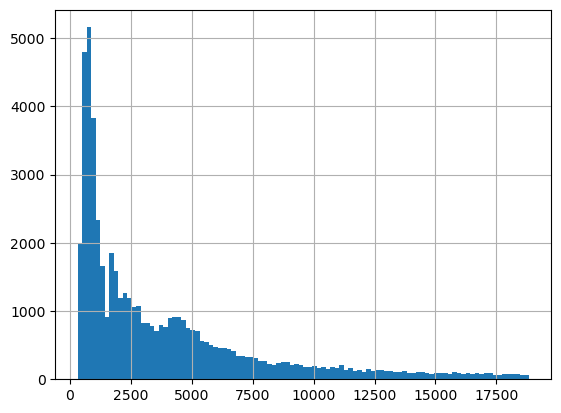

In [253]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [254]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [255]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [256]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [257]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [258]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# y=scaler.fit_transform(y)


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [260]:
X_train

array([[-0.73403949,  0.08588908,  1.41427211, ..., -0.74094669,
        -0.74819012, -0.65004787],
       [ 1.9030532 ,  0.98147332, -0.34930404, ...,  1.71057918,
         1.6070706 ,  1.7164226 ],
       [-0.54416882,  0.98147332, -0.93716275, ..., -0.41110503,
        -0.38920986, -0.48000209],
       ...,
       [-0.52307208, -0.80969515, -0.34930404, ..., -0.39327575,
        -0.36294301, -0.45166112],
       [-0.54416882,  0.98147332, -0.34930404, ..., -0.41110503,
        -0.42423232, -0.45166112],
       [-0.86061994,  0.08588908,  0.23855468, ..., -0.88358093,
        -0.91454682, -0.94762799]])

# Обучаем модель линейной регрессии

In [261]:
reg = LinearRegression().fit(X_train, y_train)

In [262]:
y_pred = reg.predict(X_test)

In [263]:
score = r2_score(y_test, y_pred)

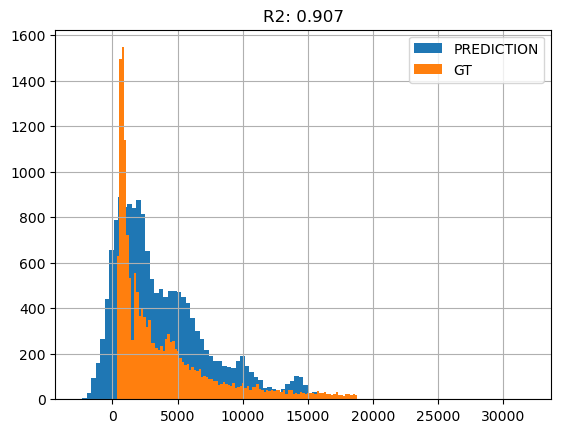

In [264]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Создаём модель MLP для задачи регрессии

In [265]:
import numpy as np

class MLPRegressor:
    def __init__(self,  
                 hidden_layer_sizes=250, 
                 max_iter = 30,
                 learning_rate=0.000001):
        
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.epochs = max_iter
        

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
  
        self.hidden_activation = np.dot(X, self.weights_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        self.output_activation = np.dot(self.hidden_output, self.weights_output) + self.bias_output
        self.predicted_output = self.output_activation 

        return self.predicted_output

    def backward(self, X, y):
    
        output_error = y - self.predicted_output
        output_delta = output_error 
        
        hidden_error = np.dot(output_delta, self.weights_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_output += np.dot(self.hidden_output.T, output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.weights_hidden += np.dot(X.T, hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y):
        
        np.random.seed(42)
        self.weights_hidden = np.random.randn(X.shape[1], self.hidden_layer_sizes)
        self.weights_output = np.random.randn(self.hidden_layer_sizes, 1)
        self.bias_hidden = np.zeros((1, self.hidden_layer_sizes))
        self.bias_output = np.zeros((1, 1))


        for epoch in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y)
            loss = np.mean(np.abs(y - output))  
            print(f'Epoch {epoch+1}, Loss: {loss}')


model = MLPRegressor()
model.train(X_train, y_train)

output = model.forward(X_test)
score =r2_score(y_test, output) 
print(f'Score = {score}')


Epoch 1, Loss: 3947.552609188198


C:\Users\vikel\AppData\Local\Temp\ipykernel_19384\838259132.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 2, Loss: 6082.353528895819
Epoch 3, Loss: 5386.268899530165
Epoch 4, Loss: 6080.637871268344
Epoch 5, Loss: 6325.5262153256035
Epoch 6, Loss: 2735.2570079956863
Epoch 7, Loss: 1734.9747739029126
Epoch 8, Loss: 1349.2140313549614
Epoch 9, Loss: 1211.3019735705225
Epoch 10, Loss: 1153.7411178063023
Epoch 11, Loss: 1090.6631389727447
Epoch 12, Loss: 1034.2208401223859
Epoch 13, Loss: 983.0483963607418
Epoch 14, Loss: 927.9660123426208
Epoch 15, Loss: 889.6671939105867
Epoch 16, Loss: 851.0599567608541
Epoch 17, Loss: 823.2660846880923
Epoch 18, Loss: 836.3901716025149
Epoch 19, Loss: 805.9580194718176
Epoch 20, Loss: 847.5851928384081
Epoch 21, Loss: 771.629136671466
Epoch 22, Loss: 792.070843279273
Epoch 23, Loss: 726.0006990208706
Epoch 24, Loss: 751.8228618229516
Epoch 25, Loss: 688.8741366508012
Epoch 26, Loss: 712.4817441453799
Epoch 27, Loss: 661.8974747255148
Epoch 28, Loss: 680.2708994748277
Epoch 29, Loss: 639.1840963450618
Epoch 30, Loss: 639.1037105383039
Score = 0.933277

# Проверяем модель MLP на выборке Diamonds

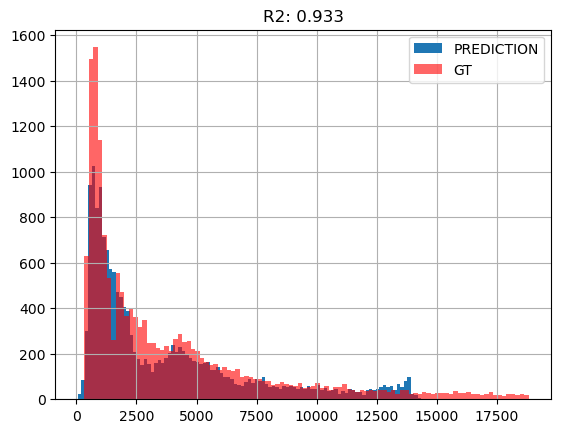

In [266]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(output.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT', color = 'red', alpha = 0.6)
plt.legend()
plt.grid();